In [1]:
import numpy as np 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
database = 'database.sqlite'

In [2]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
leagues = pd.read_sql("""SELECT *
                        FROM League;""", conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [5]:
Partidos = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS Pais, 
                                        League.name AS Liga, 
                                        season AS temporada, 
                                        date AS Fecha,
                                        HT.team_long_name AS  Equipo_Local,
                                        AT.team_long_name AS Equipo_Visitante,
                                        home_team_goal AS Goles_Equipo_Local, 
                                        away_team_goal AS Goles_Equipo_Visitante                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE Pais = 'England'
                                ORDER by date;""", conn)
Partidos

,id,Pais,Liga,temporada,Fecha,Equipo_Local,Equipo_Visitante,Goles_Equipo_Local,Goles_Equipo_Visitante
0,1730,England,England Premier League,2008/2009,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0
1,1731,England,England Premier League,2008/2009,2008-08-16 00:00:00,Sunderland,Liverpool,0,1
2,1732,England,England Premier League,2008/2009,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1
3,1734,England,England Premier League,2008/2009,2008-08-16 00:00:00,Everton,Blackburn Rovers,2,3
4,1735,England,England Premier League,2008/2009,2008-08-16 00:00:00,Middlesbrough,Tottenham Hotspur,2,1
...,...,...,...,...,...,...,...,...,...
3035,4705,England,England Premier League,2015/2016,2016-05-15 00:00:00,Stoke City,West Ham United,2,1
3036,4706,England,England Premier League,2015/2016,2016-05-15 00:00:00,Swansea City,Manchester City,1,1
3037,4707,England,England Premier League,2015/2016,2016-05-15 00:00:00,Watford,Sunderland,2,2
3038,4708,England,England Premier League,2015/2016,2016-05-15 00:00:00,West Bromwich Albion,Liverpool,1,1


In [6]:
Partidos_Locales = Partidos[['Equipo_Local' , 'Goles_Equipo_Local','Goles_Equipo_Visitante']]
Partidos_Locales.columns = ['Equipo','Goles Realizados','Goles Recibidos']

Partidos_Visitante = Partidos[['Equipo_Visitante','Goles_Equipo_Visitante','Goles_Equipo_Local']]
Partidos_Visitante.columns = ['Equipo','Goles Recibidos','Goles Realizados']
Partidos_Visitante = Partidos_Visitante[['Equipo','Goles Realizados','Goles Recibidos']]


Partidos_Total = pd.concat([Partidos_Locales],ignore_index=True)
Partidos_Total = Partidos_Total.groupby('Equipo').mean()

In [7]:
Partidos_Total

,Goles Realizados,Goles Recibidos
Equipo,,
Arsenal,2.013158,0.802632
Aston Villa,1.177632,1.302632
Birmingham City,1.000000,0.921053
Blackburn Rovers,1.289474,1.184211
Blackpool,1.578947,1.947368
Bolton Wanderers,1.368421,1.513158
Bournemouth,1.210526,1.789474
Burnley,1.026316,1.342105
Cardiff City,1.052632,1.842105


In [8]:
def MATCH(Local,Visitante):
    lamb_Local = Partidos_Total.at[Local,'Goles Realizados'] * Partidos_Total.at[Visitante,'Goles Recibidos']
    lamb_Visitante = Partidos_Total.at[Visitante,'Goles Realizados'] * Partidos_Total.at[Local,'Goles Recibidos']
    prob_local, prob_visitante, prob_empate = 0, 0, 0
    for x in range(0,12): 
        for y in range(0, 12): 
            p = poisson.pmf(x, lamb_Local) * poisson.pmf(y, lamb_Visitante)
            if x == y:
                prob_empate += p
            elif x > y:
                prob_local += p
            else:
                prob_visitante += p
                
    return [prob_local,prob_visitante,prob_empate]

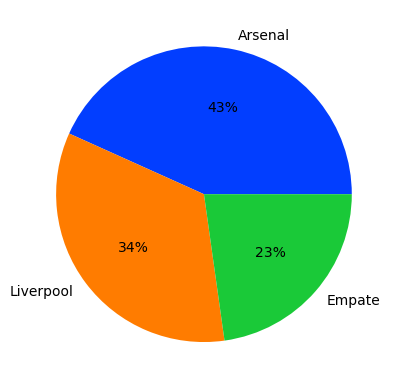

In [9]:
Local = 'Arsenal' 
Visitante = 'Liverpool'
data = MATCH(Local,Visitante)
labels = [Local,Visitante,'Empate']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()